**Tăng Cường Dữ Liệu**

1. Thêm Tiếng Ồn (Add Noise): Thêm một lượng nhiễu ngẫu nhiên vào tín hiệu âm thanh gốc. Phương pháp này giúp tạo ra các biến thể của tín hiệu mà vẫn giữ nguyên đặc điểm cảm xúc chính của âm thanh.

2. Dịch chuyển tín hiệu âm thanh theo trục thời gian

In [8]:
import numpy as np
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio
import os
import pandas as pd

In [9]:
class AudioAugmentation:
    def __init__(self, noise_factor=0.035, shift_range=10000):
        self.noise_factor = noise_factor
        self.shift_range = shift_range

    def add_noise(self, data):
        noise_amp = self.noise_factor * np.random.uniform() * np.amax(data)
        return data + noise_amp * np.random.normal(size=data.shape[0])

    def time_shift(self, data):
        shift_value = int(np.random.uniform(low=-self.shift_range, high=self.shift_range))
        return np.roll(data, shift_value)

In [10]:
def audio_augmentation(file_name, subdirectory_path, output_folder):
    file_path = os.path.join(subdirectory_path, file_name)
    data, sr = librosa.load(file_path, sr=None)

    audioAugmentation = AudioAugmentation()
    
    # Tạo thư mục đích nếu nó chưa tồn tại
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    original_audio_path = os.path.join(output_folder, file_name)
    sf.write(original_audio_path, data, sr)

    noisy_data = audioAugmentation.add_noise(data)
    noisy_audio_path = os.path.join(output_folder, f'noisy_{file_name}')
    sf.write(noisy_audio_path, noisy_data, sr)

    time_shift_audio_path = os.path.join(output_folder, f'time_shift_{file_name}')
    time_shift_data = audioAugmentation.time_shift(data)
    sf.write(time_shift_audio_path, time_shift_data, sr)
    
    return original_audio_path, noisy_audio_path, time_shift_audio_path


In [11]:
def process_file(folder, subdirectory_path, output_folder):
    """
    Xử lý tất cả các tệp WAV trong thư mục: tăng cường dữ liệu và tạo DataFrame với cột 'File_Path' và 'Label'.
    """
    label = folder
    file_paths_with_labels = []

    for file_name in os.listdir(subdirectory_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(folder, file_name)
            # output_folder_path = os.path.join(output_folder, folder)
            original_audio_path, noisy_audio_path, time_shift_audio_path = audio_augmentation(file_name, subdirectory_path, output_folder)
            file_paths_with_labels.append((original_audio_path, label))
            file_paths_with_labels.append((noisy_audio_path, label))
            file_paths_with_labels.append((time_shift_audio_path, label))
    
    return file_paths_with_labels

In [12]:
def process_folder(input_folder, output_folder):
    all_file_paths_with_labels = []
    for root, dirs, files in os.walk(input_folder):
        for folder in dirs:
            subdirectory_path = os.path.join(root, folder)
            file_paths_with_labels = process_file(folder, subdirectory_path, output_folder)
            all_file_paths_with_labels.extend(file_paths_with_labels)
    
    return all_file_paths_with_labels

In [13]:
input_folder = r'D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\train_test_splited_data\raw_data'
output_folder = r'D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\train_test_splited_data\augmentation_data'

# Create DataFrames and save CSV files


In [14]:
# input_folder = r'D:\data_analysis\speech_emotion_recognition\data\VietnameseDataset\train_test_splited_data\raw_data'
# output_folder = r'D:\data_analysis\speech_emotion_recognition\data\VietnameseDataset\train_test_splited_data\augmentation_data'

# # Create DataFrames and save CSV files
# for dataset_type in ['train', 'test', 'validation']:
#     _input_folder = os.path.join(input_folder, dataset_type)
#     _output_folder = os.path.join(output_folder, dataset_type)
#     all_file_paths_with_labels = process_folder(_input_folder, _output_folder)
#     df = pd.DataFrame(all_file_paths_with_labels, columns=['file_path', 'label'])
#     csv_path = os.path.join(output_folder, f'{dataset_type}_file_paths_with_labels.csv')
#     df.to_csv(csv_path, index=False)
#     print(f"{dataset_type.capitalize()} CSV file saved at: {csv_path}")

Train CSV file saved at: D:\data_analysis\speech_emotion_recognition\data\VietnameseDataset\train_test_splited_data\augmentation_data\train_file_paths_with_labels.csv
Test CSV file saved at: D:\data_analysis\speech_emotion_recognition\data\VietnameseDataset\train_test_splited_data\augmentation_data\test_file_paths_with_labels.csv
Validation CSV file saved at: D:\data_analysis\speech_emotion_recognition\data\VietnameseDataset\train_test_splited_data\augmentation_data\validation_file_paths_with_labels.csv


In [15]:
file_path = r"D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\combined_data\Angry\03-01-05-01-01-01-03.wav"
data, sr = librosa.load(file_path, sr=None)
Audio(r'D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\combined_data\Angry\03-01-05-01-01-01-03.wav')

Text(0.5, 1.0, 'Original Audio')

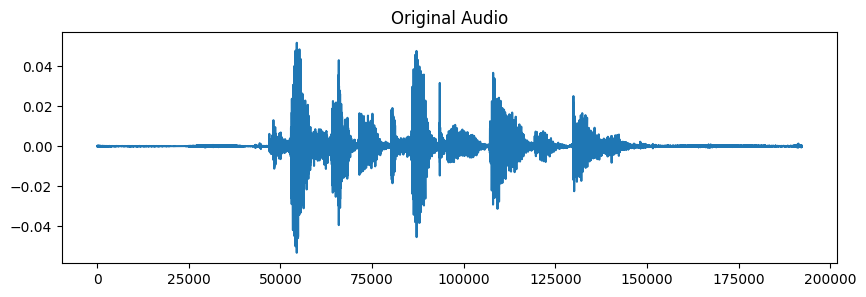

In [16]:
plt.figure(figsize=(10, 3))
plt.plot(data)
plt.title('Original Audio')

In [17]:
audioAugmentation = AudioAugmentation()
noisy_data = audioAugmentation.add_noise(data)
sf.write('test_data/noisy_audio.wav', noisy_data, sr)
Audio('test_data/noisy_audio.wav')

Text(0.5, 1.0, 'Noisy Audio')

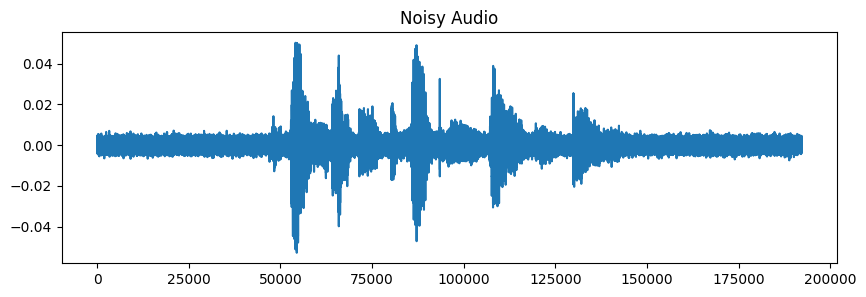

In [18]:
plt.figure(figsize=(10,3))
plt.plot(noisy_data)
plt.title('Noisy Audio')

In [19]:
time_shift_data = audioAugmentation.time_shift(data)
sf.write('test_data/shift_audio.wav', time_shift_data, sr)
Audio('test_data/shift_audio.wav')

Text(0.5, 1.0, 'Time shift Audio')

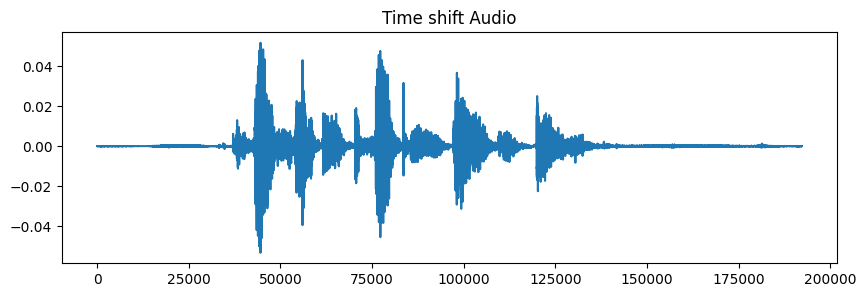

In [20]:
plt.figure(figsize=(10,3))
plt.plot(time_shift_data)
plt.title('Time shift Audio')